Fonte: UCI Machine Learning Repository — Bank Marketing  
Licença: não informada pela fonte oficial. Uso apenas para fins acadêmicos/pessoais.  


In [9]:
pip install ucimlrepo

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [14]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [ ]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


Concatenado X e Y para realiza uma analize completa dos dados. em seguida verificado o estatus dos dados com isso foi possivel identificar que se trata de de uma tabela de 45211 linhas e 17 colunas

In [16]:
# Juntar X e y para análise completa
df = pd.concat([X, y], axis=1)

# Garantir que a coluna alvo se chame 'y'
df.rename(columns={df.columns[-1]: 'y'}, inplace=True)

print("Dimensões do dataset completo:")
print(f"Shape: {df.shape}")

# Primeiras linhas
df.head()


Dimensões do dataset completo:
Shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Verificado os dados da variavel y (target) e contabilizado os yes e no e realizado uma proporção. em seguida analizado se o dataset possuia dados faltantes e foram identificados 288 dados da coluna 'job', 1857 'education', 13020 'contact' e 36059 'poutcome'

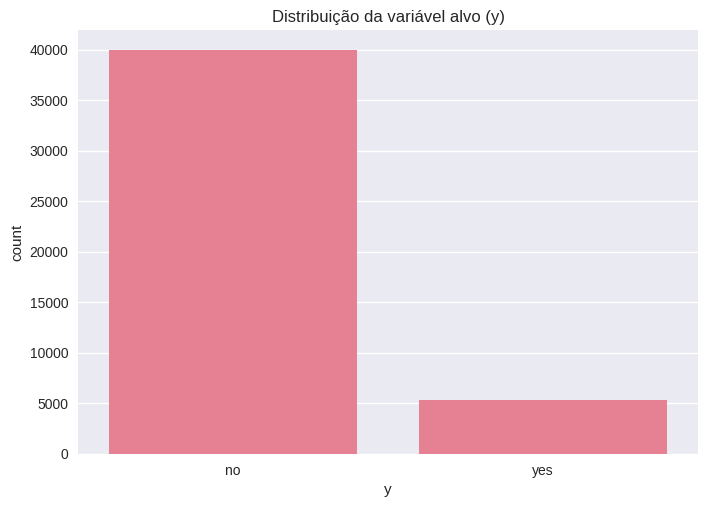

,Valores Faltantes,Percentual (%)
job,288,0.64
education,1857,4.11
contact,13020,28.80
poutcome,36959,81.75


In [20]:
# Distribuição da variável alvo
df['y'].value_counts()
df['y'].value_counts(normalize=True)

# Visualização da distribuição
sns.countplot(data=df, x='y')
plt.title('Distribuição da variável alvo (y)')
plt.show()

# Missing values
missing_info = df.isna().sum().to_frame(name='Valores Faltantes')
missing_info['Percentual (%)'] = round((df.isna().sum() / len(df)) * 100, 2)
missing_info[missing_info['Valores Faltantes'] > 0]


As variáveis foram divididas em numéricas e categóricas com a exclusão explícita da variável alvo `y`. As colunas `day_of_week` e `month`, apesar da codificação textual, foram mantidas como categóricas por representarem tempo discreto e não valor numérico contínuo. Isso será relevante nos testes estatísticos e na etapa de codificação.




In [27]:
# Converter campos de calendário para categóricos
df['day_of_week'] = df['day_of_week'].astype('category')
df['month'] = df['month'].astype('category')

# Separação correta
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.drop('y')
numerical_cols = df.select_dtypes(include=[np.number]).columns

print("Variáveis categóricas (excluindo a target):")
print(categorical_cols.tolist())
print(f"Total: {len(categorical_cols)}")

print("\nVariáveis numéricas:")
print(numerical_cols.tolist())
print(f"Total: {len(numerical_cols)}")

print("\nVariável alvo:")
print('y')


Variáveis categóricas (excluindo a target):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'poutcome']
Total: 10

Variáveis numéricas:
['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
Total: 6

Variável alvo:
y


Tratamento dos dados faltantes em colunas que não possuia dados "null" foi fubstituido por 'unknow' em seguida substituido pelos valores mais frequentes da coluna

In [28]:
# 1. Tratamento de dados faltantes
print("Tratamento de dados faltantes:")

# Para variáveis categóricas, preencher com 'unknown' ou moda
categorical_with_nan = df[categorical_cols].isnull().sum()
categorical_with_nan = categorical_with_nan[categorical_with_nan > 0].index

for col in categorical_with_nan:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Coluna {col}: preenchido {df[col].isnull().sum()} valores com '{mode_val}'")

# Verificar se ainda há dados faltantes
print(f"\nTotal de dados faltantes após tratamento: {df.isnull().sum().sum()}")

Tratamento de dados faltantes:
Coluna job: preenchido 0 valores com 'blue-collar'
Coluna education: preenchido 0 valores com 'secondary'
Coluna contact: preenchido 0 valores com 'cellular'
Coluna poutcome: preenchido 0 valores com 'failure'

Total de dados faltantes após tratamento: 0


A variável alvo apresenta forte desbalanceamento (~88% não assinam, ~12% assinam). Isso indica que o uso de acurácia como métrica isolada levaria a interpretações enganosas, já que um modelo trivial que sempre prevê "no" teria desempenho artificialmente alto. Serão utilizadas métricas complementares como F1 e AUC-ROC nas próximas etapas.


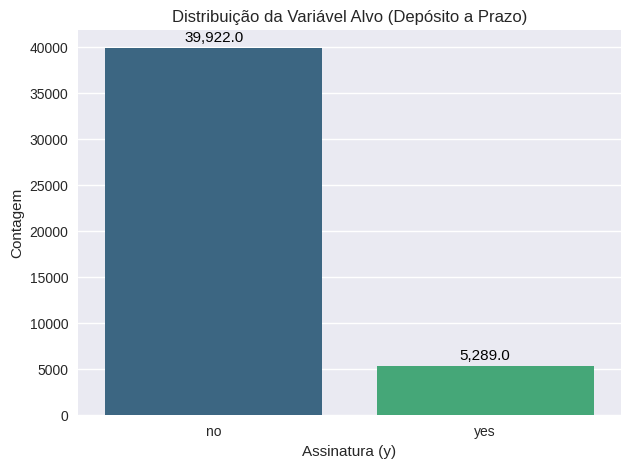

Classe majoritária: no - 39922 (88.3%)
Classe minoritária: yes - 5289 (11.7%)


In [29]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='y', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.title('Distribuição da Variável Alvo (Depósito a Prazo)')
plt.xlabel('Assinatura (y)')
plt.ylabel('Contagem')
plt.show()

target_counts = df['y'].value_counts()
print(f"Classe majoritária: {target_counts.index[0]} - {target_counts.iloc[0]} ({target_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"Classe minoritária: {target_counts.index[1]} - {target_counts.iloc[1]} ({target_counts.iloc[1]/len(df)*100:.1f}%)")


Os boxplots indicam a presença de valores extremos em algumas variáveis, o que é esperado no contexto das campanhas de telemarketing. Esses valores foram mantidos no dataset, pois fazem parte do comportamento real dos clientes e não representam erros.

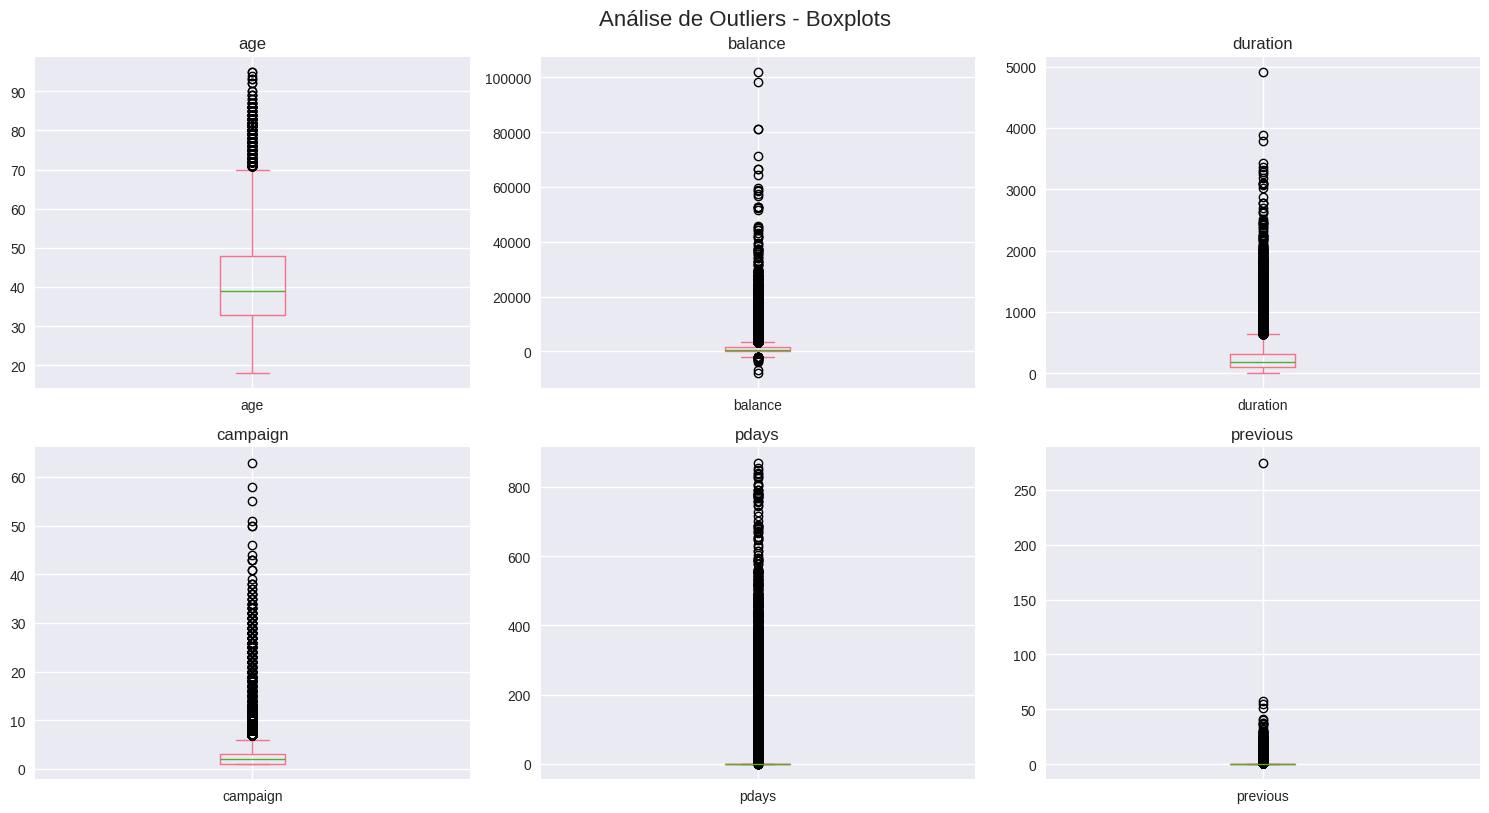

In [31]:
# 3. Análise de outliers nas variáveis numéricas
numeric_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Análise de Outliers - Boxplots', fontsize=16)

for i, var in enumerate(numeric_vars):
    row, col = i // 3, i % 3
    if i < len(numeric_vars):
        df[var].plot(kind='box', ax=axes[row, col], title=var)
        axes[row, col].set_ylabel('')

# Remover eixos vazios
for i in range(len(numeric_vars), 9):
    row, col = i // 3, i % 3
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

As variáveis numéricas foram visualizadas por meio de histogramas. Os eixos vazios foram removidos apenas para facilitar a leitura, sem nenhum ajuste nos dados.


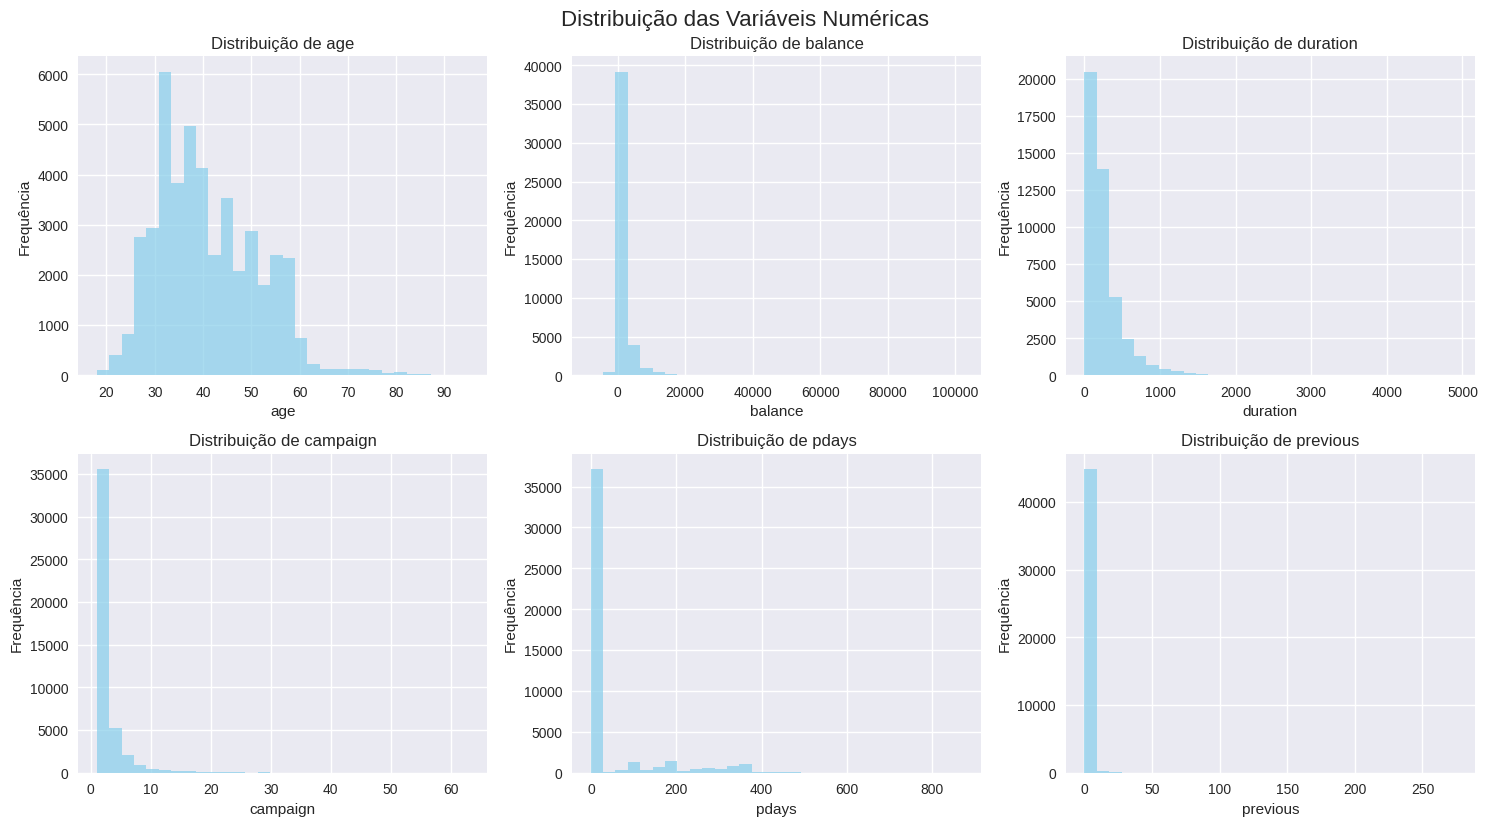

In [ ]:
# 4. Distribuição das variáveis numéricas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

for i, var in enumerate(numeric_vars):
    row, col = i // 3, i % 3
    df[var].hist(bins=30, ax=axes[row, col], alpha=0.7, color='skyblue')
    axes[row, col].set_title(f'Distribuição de {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequência')

# Remover eixos vazios
for i in range(len(numeric_vars), 9):
    row, col = i // 3, i % 3
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

A maioria das categorias categóricas está concentrada em alguns grupos específicos, como `blue-collar` e `management`. Além disso, nota-se que maio foi o mês com maior volume de chamadas, indicando maior atividade das campanhas nesse período.


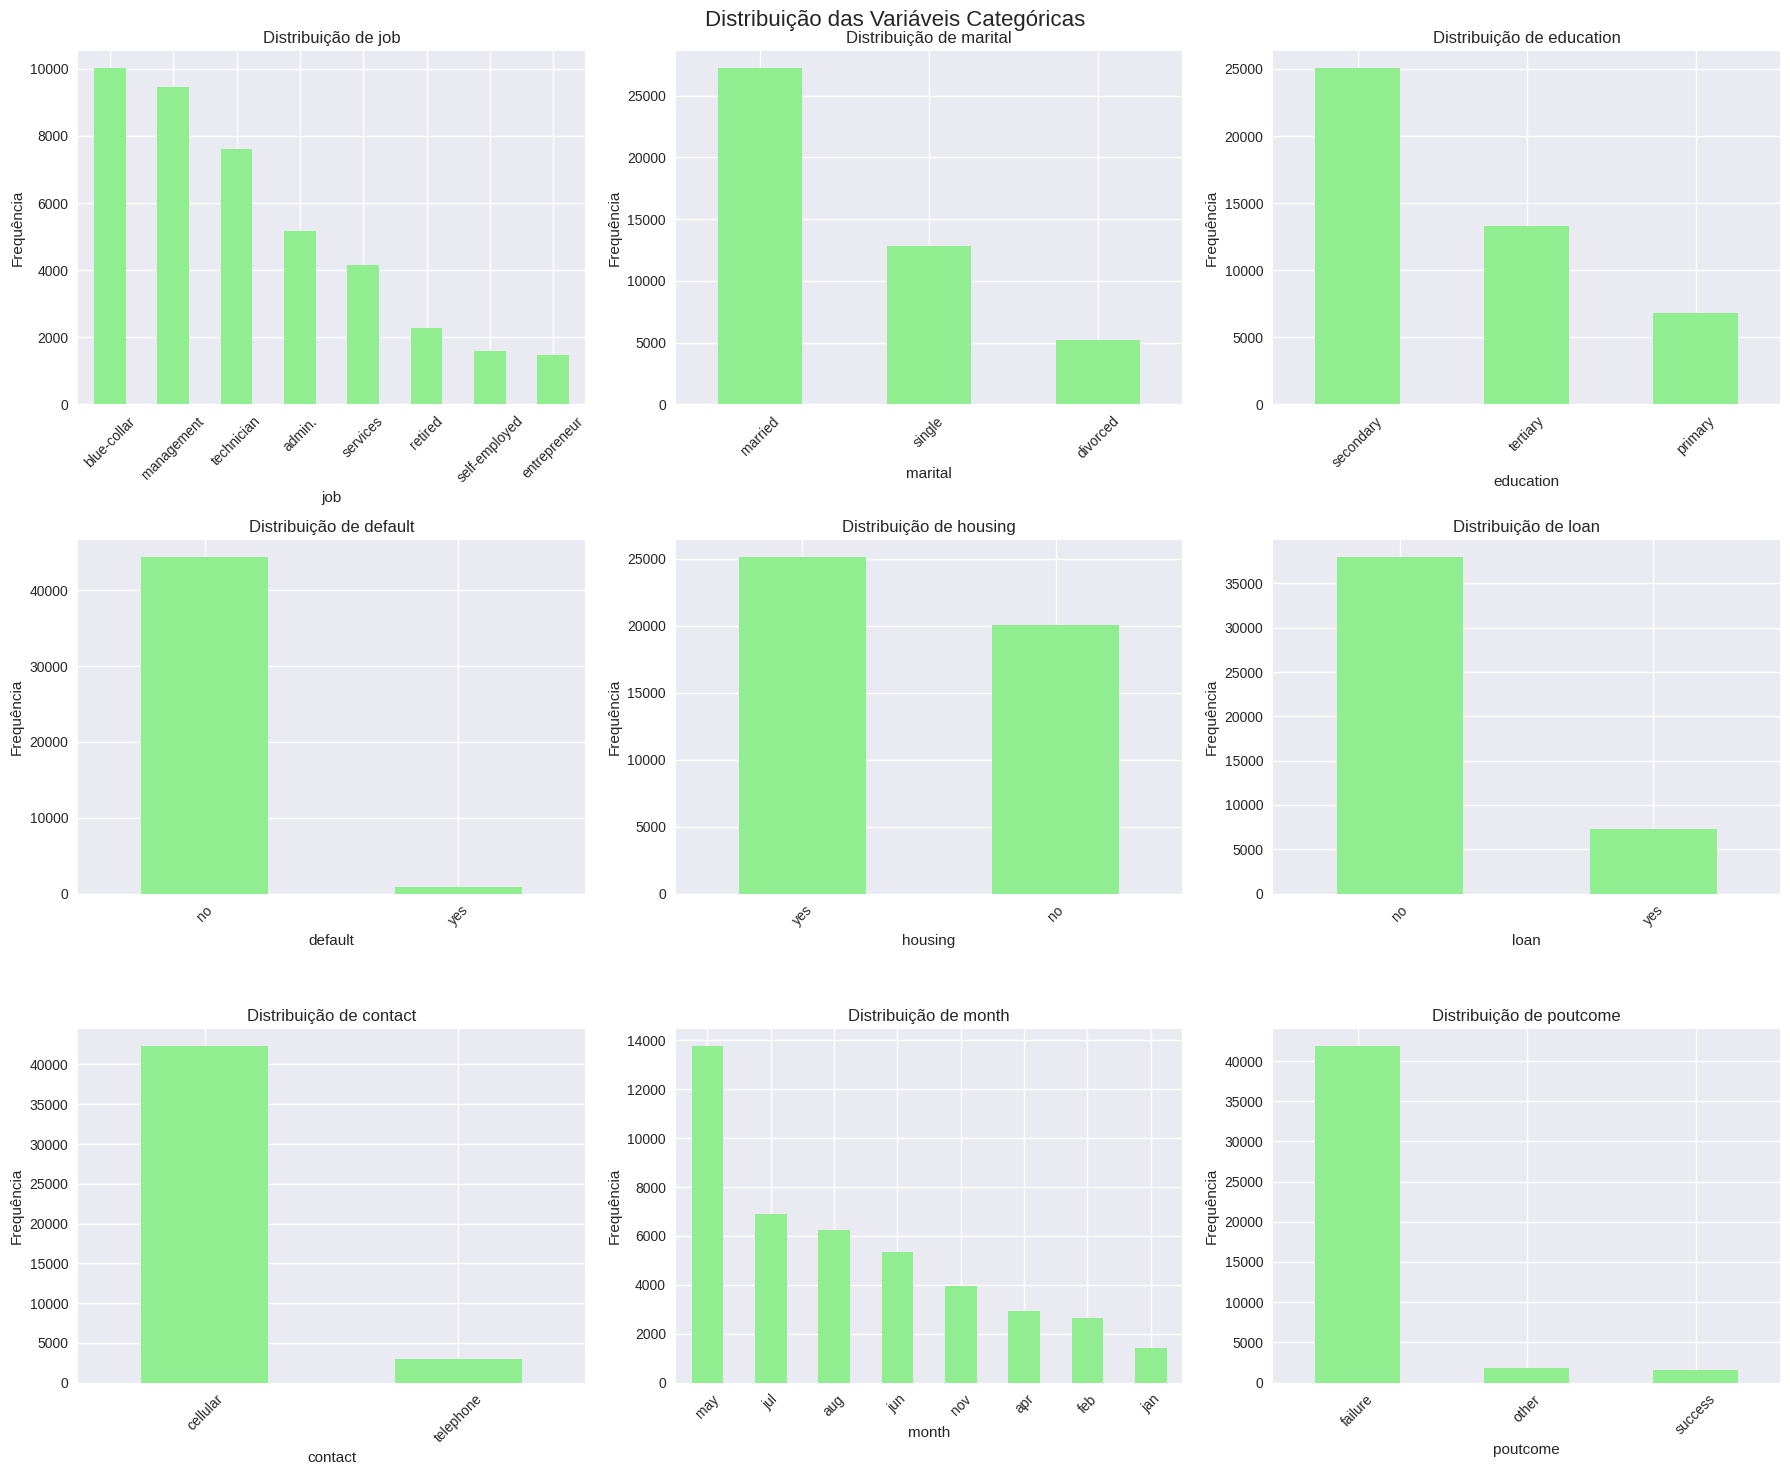

In [ ]:
# 5. Análise das variáveis categóricas
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)

for i, var in enumerate(categorical_vars):
    row, col = i // 3, i % 3
    value_counts = df[var].value_counts()

    # Plotar top categorias se houver muitas
    if len(value_counts) > 8:
        value_counts = value_counts.head(8)

    value_counts.plot(kind='bar', ax=axes[row, col], color='lightgreen')
    axes[row, col].set_title(f'Distribuição de {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequência')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

O heatmap mostra baixa correlação entre as variáveis numéricas, sem relações lineares fortes. Todas foram mantidas na análise.


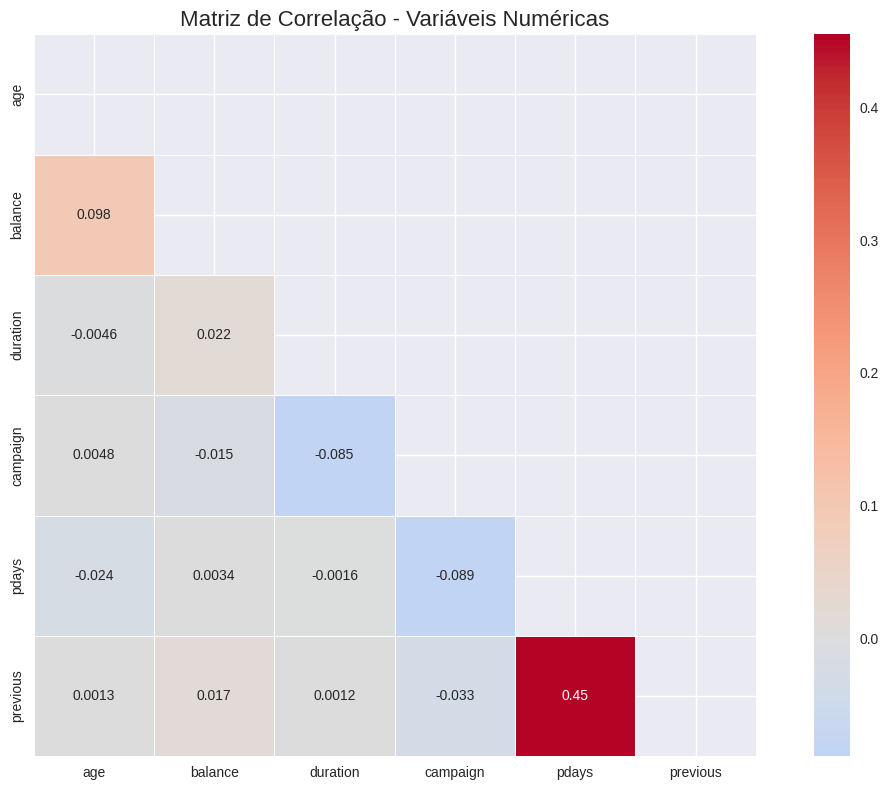

Correlações mais fortes:
pdays     previous    0.454820
previous  pdays       0.454820
age       balance     0.097783
balance   age         0.097783
campaign  pdays      -0.088628
pdays     campaign   -0.088628
dtype: float64


In [ ]:
# 6. Heatmap de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_vars].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, mask=mask)
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

print("Correlações mais fortes:")
corr_pairs = correlation_matrix.unstack().sort_values(key=abs, ascending=False)
corr_pairs = corr_pairs[corr_pairs != 1.0]  # Remover auto-correlações
print(corr_pairs.head(6))

Os boxplots mostram como as variáveis numéricas se distribuem entre `yes` e `no`. Algumas delas, como `duration` e `campaign`, apresentam diferenças visuais mais evidentes entre os grupos.


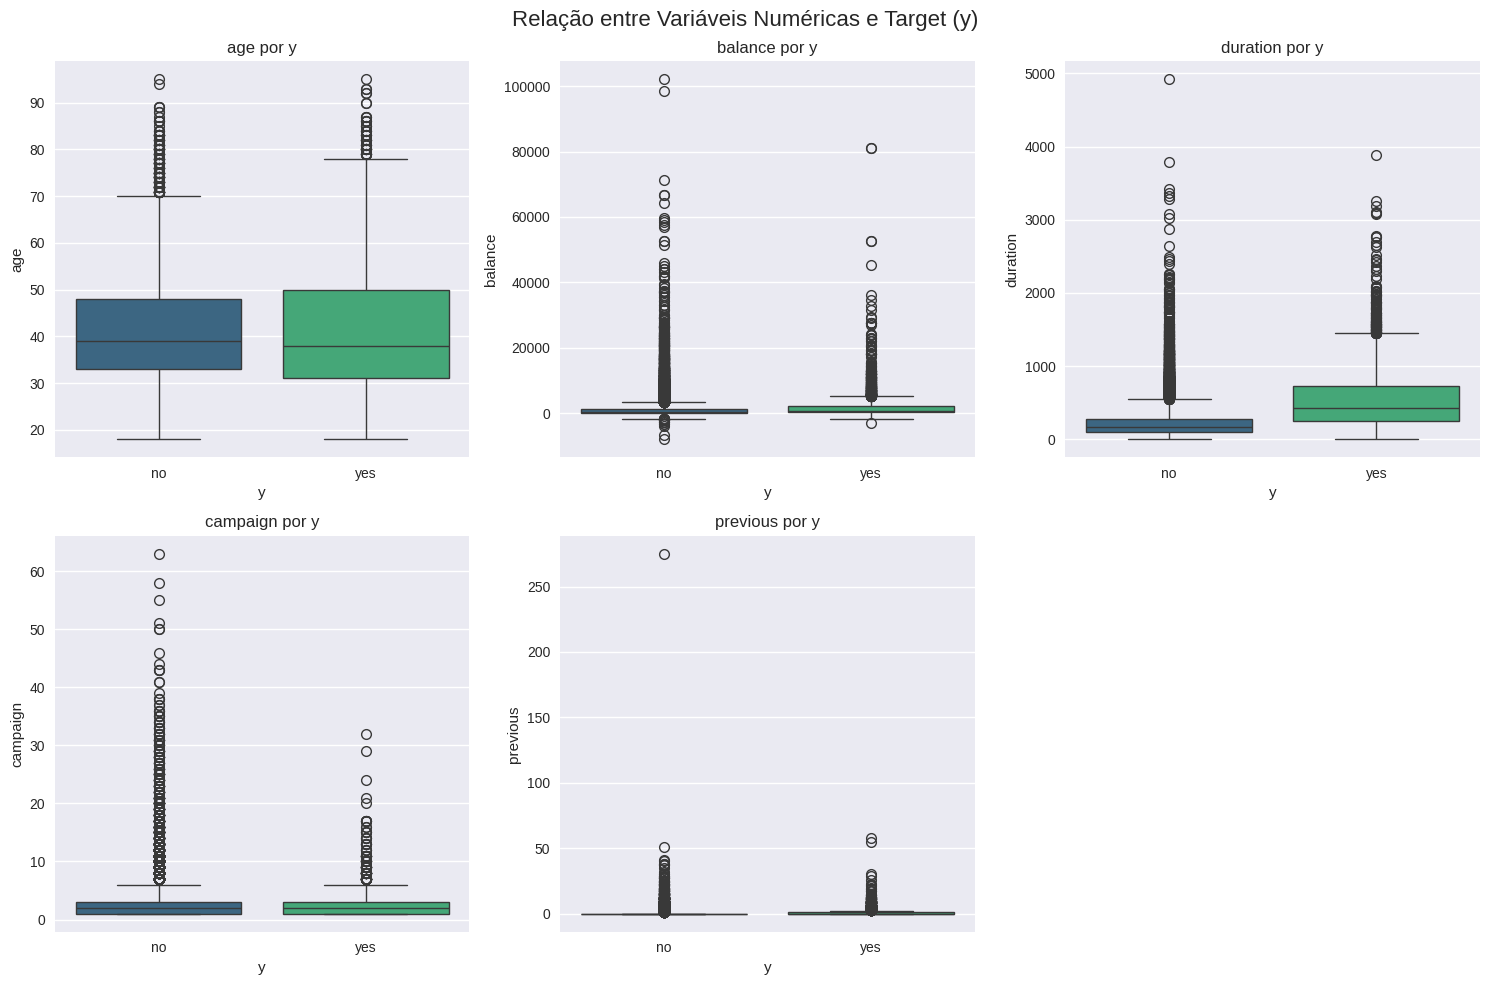

In [35]:
# 7. Relação entre variáveis numéricas e target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Relação entre Variáveis Numéricas e Target (y)', fontsize=16)

important_numeric = ['age', 'balance', 'duration', 'campaign', 'previous']  # remover pdays

for i, var in enumerate(important_numeric):
    row, col = divmod(i, 3)
    sns.boxplot(data=df, x='y', y=var, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'{var} por y')
    axes[row, col].set_xlabel('y')
    axes[row, col].set_ylabel(var)

# esconder subplot extra
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.show()


A análise mostra como as categorias das variáveis se distribuem entre `yes` e `no`, permitindo observar diferenças de adesão entre os grupos. Nenhuma modificação foi aplicada aos dados, sendo esta apenas uma etapa visual de comparação.


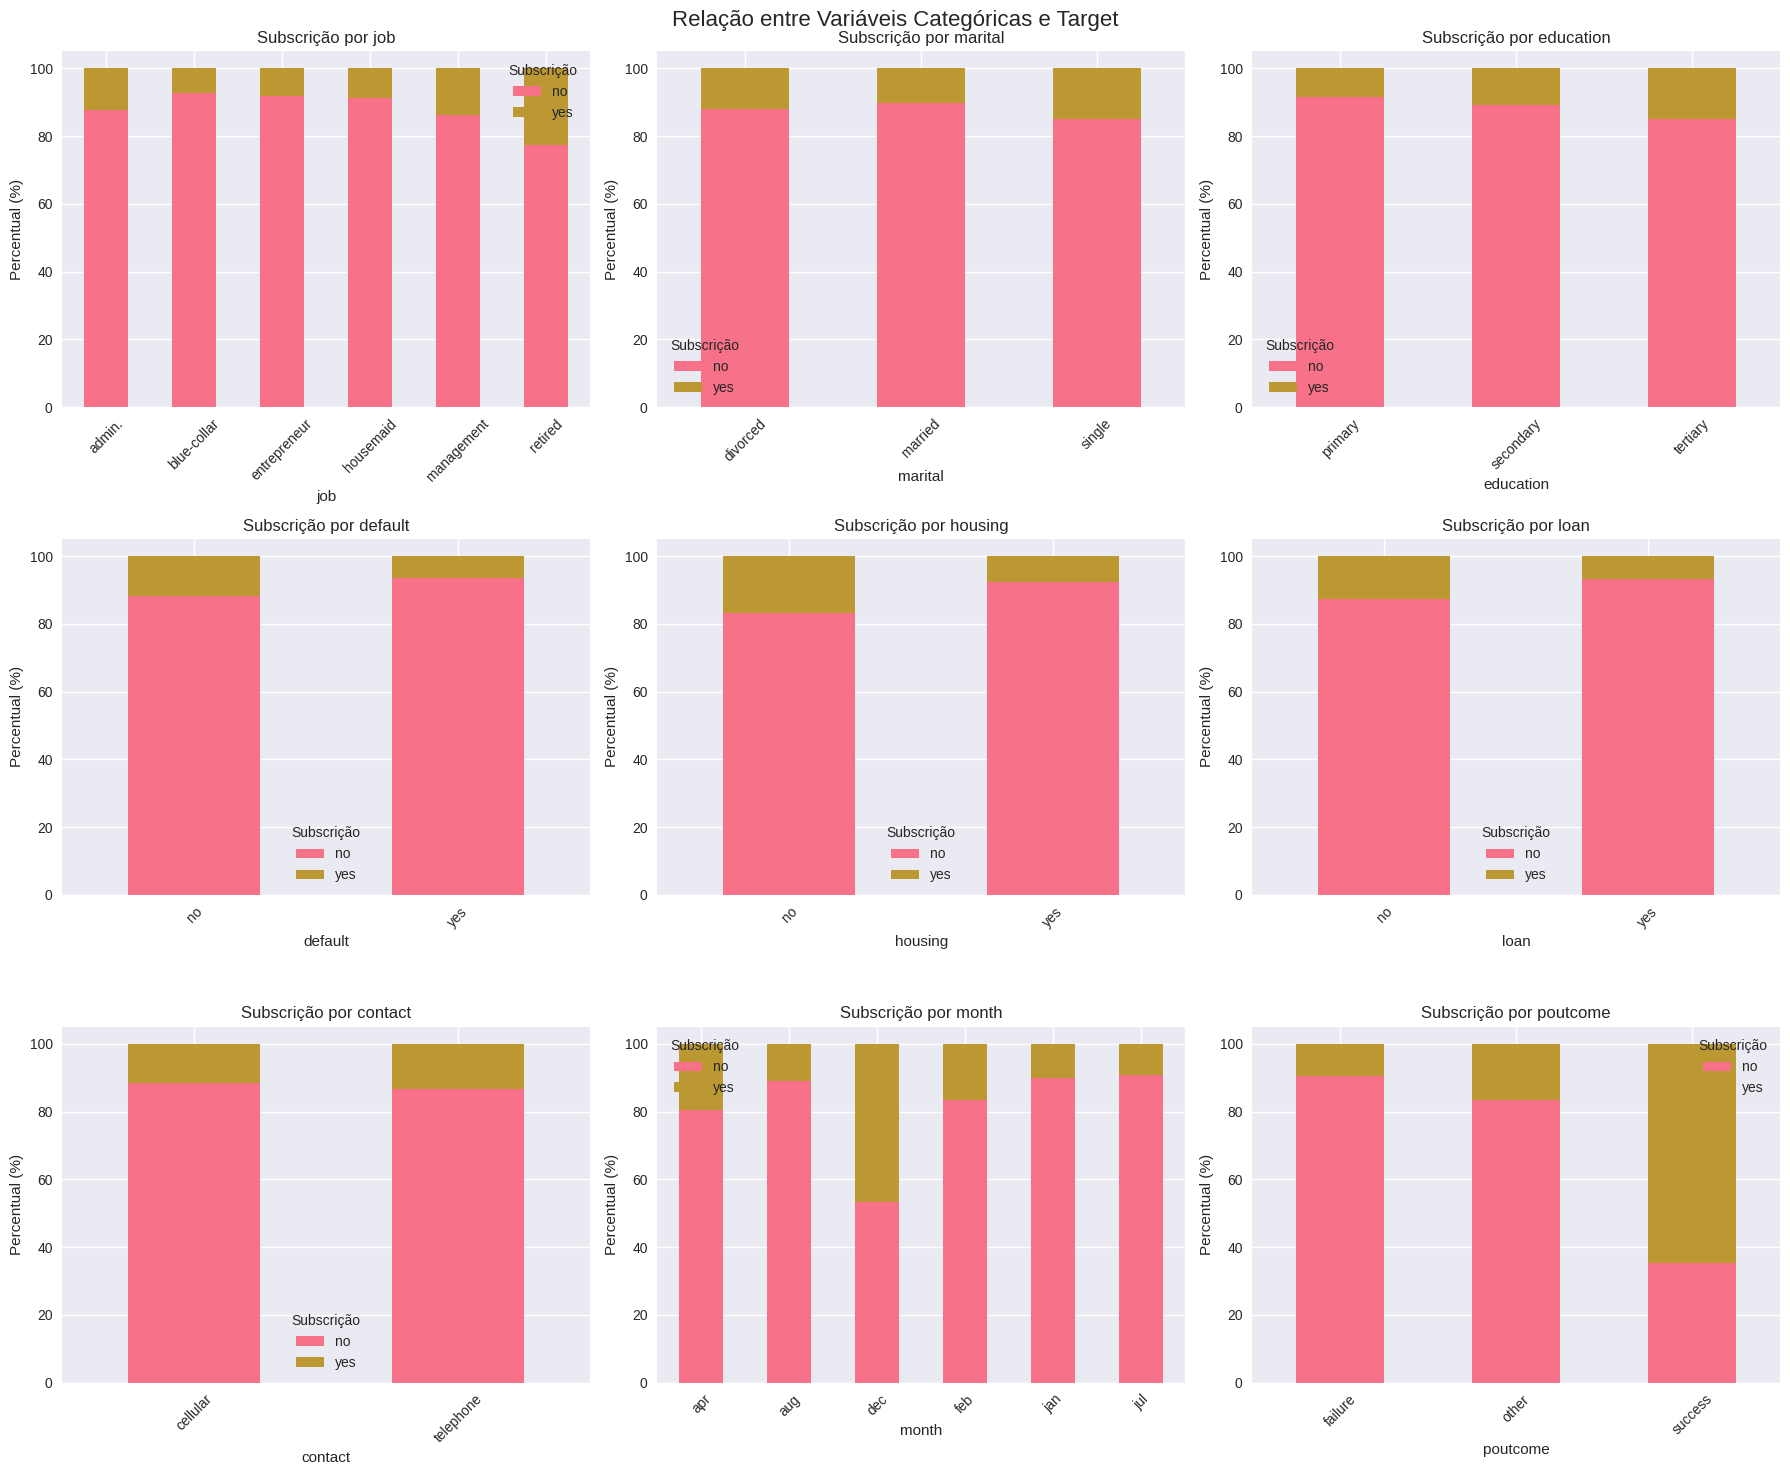

In [38]:
# 8. Relação entre variáveis categóricas e target
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Relação entre Variáveis Categóricas e Target', fontsize=16)

for i, var in enumerate(categorical_vars):
    row, col = i // 3, i % 3
    # Criar tabela de contingência
    ct = pd.crosstab(df[var], y.iloc[:, 0], normalize='index') * 100

    # Plotar apenas top categorias
    if len(ct) > 6:
        ct = ct.head(6)

    ct.plot(kind='bar', ax=axes[row, col], stacked=True)
    axes[row, col].set_title(f'Subscrição por {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Percentual (%)')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].legend(title='Subscrição')

plt.tight_layout()
plt.show()

A análise temporal mostra que as ligações se concentraram principalmente em maio, indicando maior atividade da campanha nesse período.


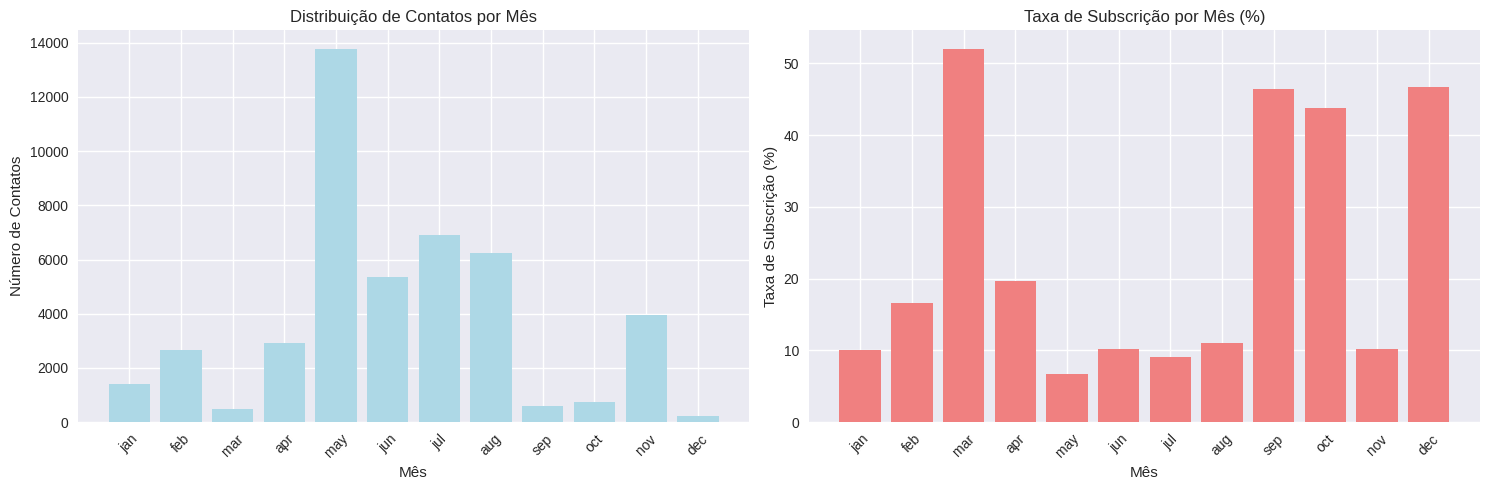

In [40]:
# 9. Análise temporal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribuição por mês
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_data = df['month'].value_counts().reindex(month_order)

axes[0].bar(month_data.index, month_data.values, color='lightblue')
axes[0].set_title('Distribuição de Contatos por Mês')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Número de Contatos')
axes[0].tick_params(axis='x', rotation=45)

# Taxa de sucesso por mês
success_by_month = df.groupby('month')[y.columns[0]].apply(lambda x: (x == 'yes').mean()).reindex(month_order)
axes[1].bar(success_by_month.index, success_by_month.values * 100, color='lightcoral')
axes[1].set_title('Taxa de Subscrição por Mês (%)')
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Taxa de Subscrição (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Tratamento das variaveis categoricas com a remoção da target do dataframe principal. e aplicado a padronização(scaling) essencial para que a variavel balance não domine age. Em seguida analizado os dados treinados.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
df['y_encoded'] = le.fit_transform(df['y']) # no=0, yes=1

# 2. Tratamento de Variáveis Categóricas (One-Hot Encoding)
# Removemos 'y' original e a target codificada temporariamente para processar o X
X = df.drop(['y', 'y_encoded'], axis=1)
X = pd.get_dummies(X, drop_first=True) # Transforma texto em números

# 3. Definição de Target para Classificação
y_class = df['y_encoded']

# 4. Divisão Treino e Teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3, random_state=42, stratify=y_class)

# 5. Padronização (Scaling)
# Essencial para que variáveis como 'balance' não dominem 'age'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertendo de volta para DataFrame para manter os nomes das colunas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Pré-processamento concluído.")
print(f"Shape Treino: {X_train.shape}")

Pré-processamento concluído.
Shape Treino: (31647, 67)


Analize de naive e regressão logistica

A Regressão Logística tem uma ROC-AUC altíssima (0.9802), o que indica uma ótima capacidade de separar as classes no espaço de probabilidades.
No entanto, o recall da classe 1 é muito baixo (0.33), ou seja, só identifica 33% dos verdadeiros positivos da classe 1.
A precisão da classe 1 melhorou (0.64 vs 0.45 no Naive Bayes), mas ainda assim o F1 da classe 1 é baixo (0.44).
A acurácia aumentou para 90% devido ao bom desempenho na classe maioritária.

=== Relatório Naive Bayes ===
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     11977
           1       0.36      0.50      0.42      1587

    accuracy                           0.84     13564
   macro avg       0.64      0.69      0.66     13564
weighted avg       0.86      0.84      0.85     13564

ROC-AUC: 0.7804

=== Relatório Regressão Logística ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11977
           1       0.64      0.34      0.44      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.89      0.90      0.89     13564

ROC-AUC: 0.9027


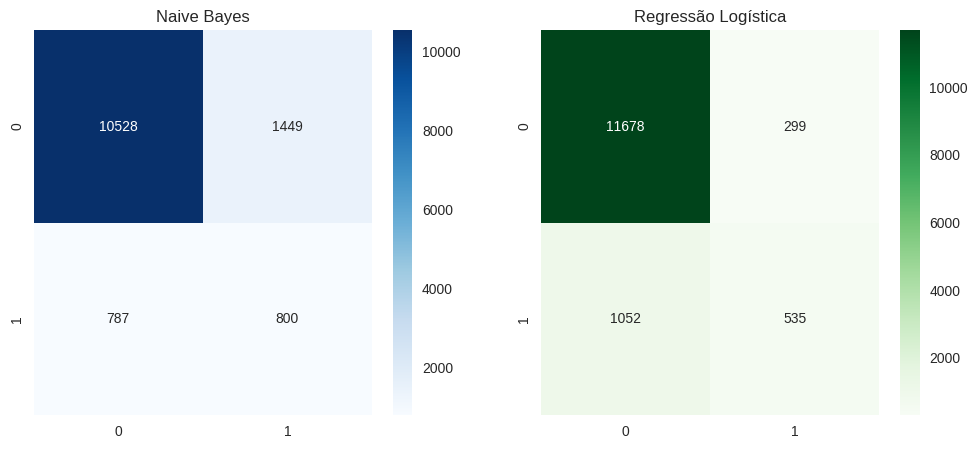

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# --- A. Naive Bayes (Baseline) ---
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# --- B. Regressão Logística ---
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

# --- Avaliação Comparativa ---
print("=== Relatório Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_nb):.4f}")

print("\n=== Relatório Regressão Logística ===")
print(classification_report(y_test, y_pred_log))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_log):.4f}")

# Gráfico da Matriz de Confusão Comparativa
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Naive Bayes")
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Regressão Logística")
plt.show()


TREINANDO MODELO: NAIVE BAYES (GAUSSIANO)
Iniciando treinamento do Naive Bayes...
Treinamento concluído!

TREINANDO MODELO: REGRESSÃO LOGÍSTICA
Iniciando treinamento da Regressão Logística...
Treinamento concluído!

ANÁLISE COMPARATIVA DOS MODELOS

=== NAIVE BAYES ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11977
           1       0.45      0.46      0.45      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564

ROC-AUC Score: 0.8081
Acurácia: 0.8699

=== REGRESSÃO LOGÍSTICA ===
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     11977
           1       0.41      0.79      0.54      1587

    accuracy                           0.84     13564
   macro avg       0.69      0.82      0.72     13564
weighted avg       0.90      0.84      0.86     13564

ROC-AUC 

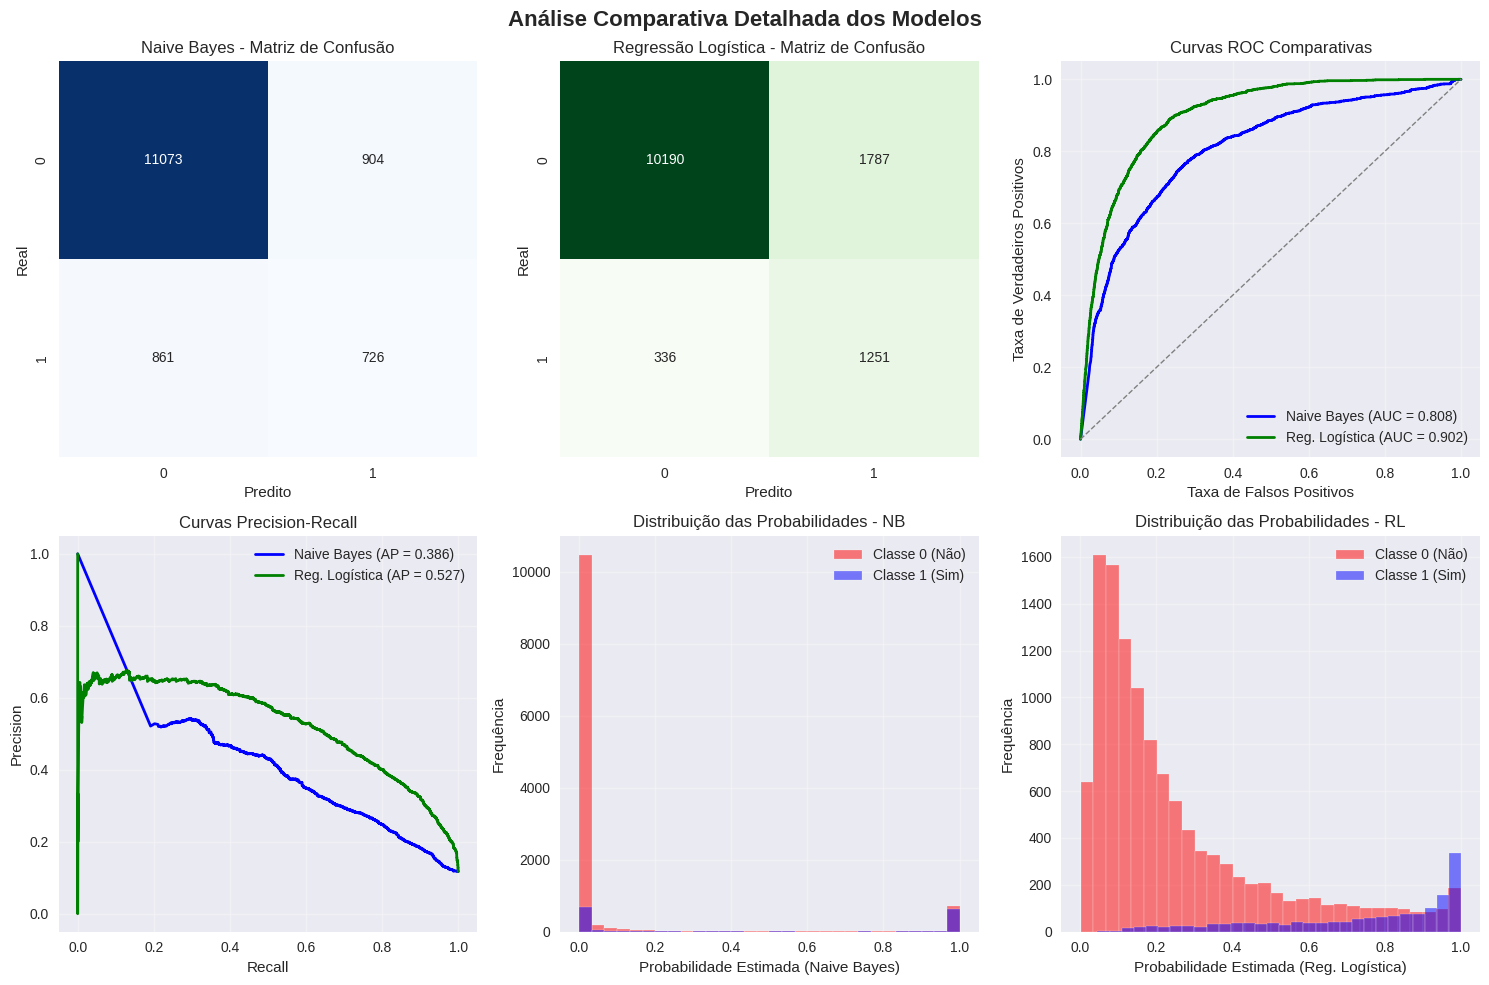


ANÁLISE DETALHADA DAS MÉTRICAS
                Modelo  Acurácia   ROC-AUC  Precision_0  Recall_0      F1_0  \
0          Naive Bayes  0.869876  0.808146     0.927853  0.924522  0.926185   
1  Regressão Logística  0.843483  0.901691     0.968079  0.850797  0.905657   

   Precision_1  Recall_1      F1_1  
0     0.445399  0.457467  0.451352  
1     0.788280  0.788280  0.540973  


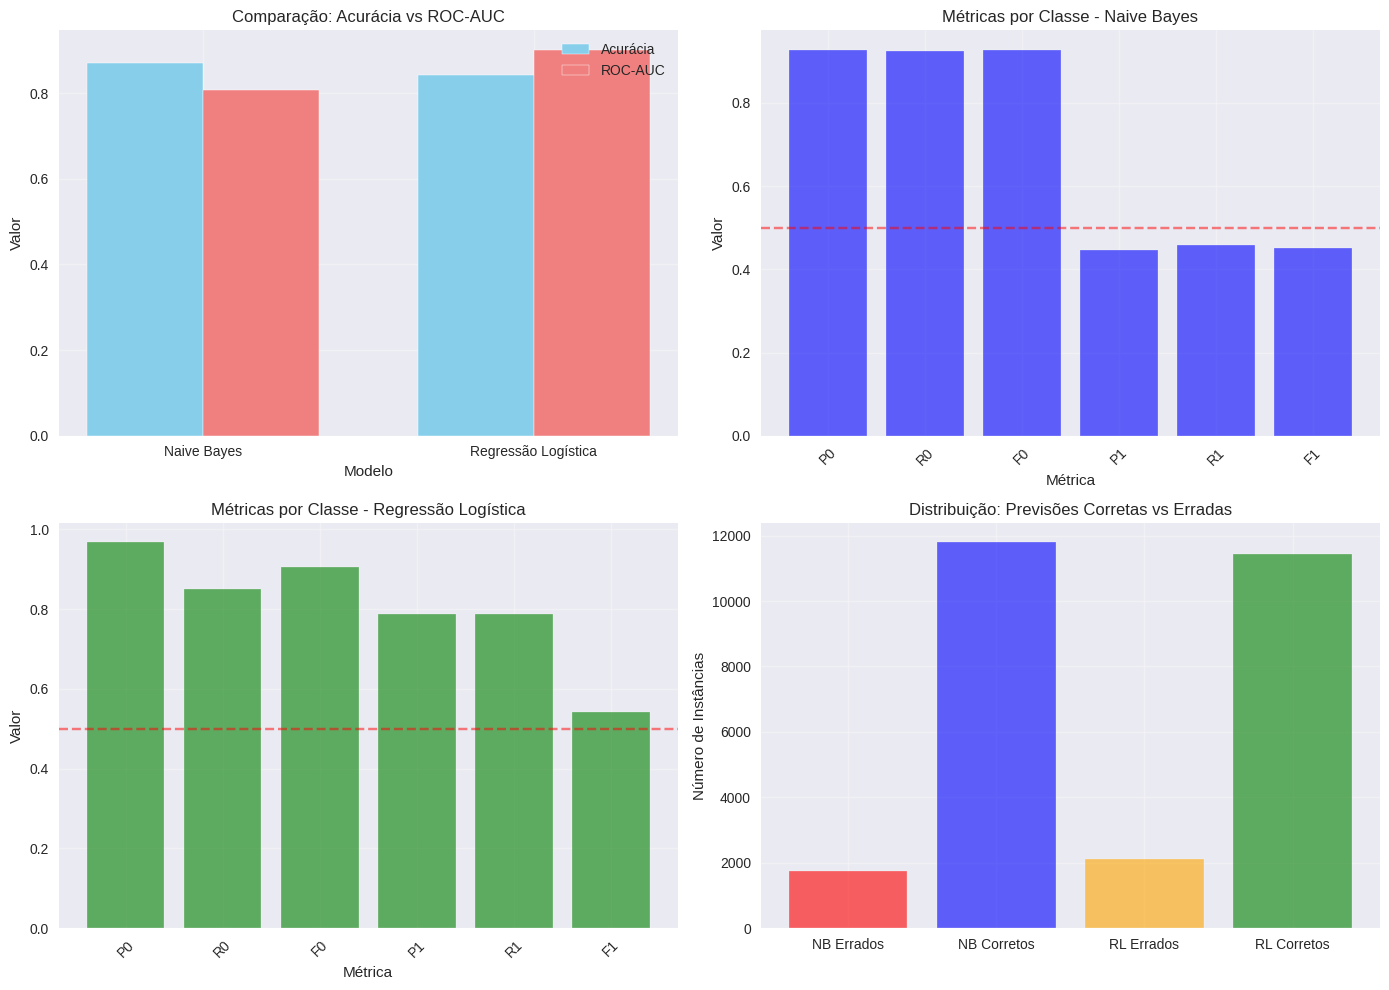


ANÁLISE DOS ERROS DE CLASSIFICAÇÃO
Número de instâncias onde os modelos discordam: 1936
Percentual de discordância: 14.27%

=== Análise de Falsos Positivos/Negativos ===

Naive Bayes:
  Falsos Positivos: 904
  Falsos Negativos: 861

Regressão Logística:
  Falsos Positivos: 1787
  Falsos Negativos: 336

CONCLUSÃO E RECOMENDAÇÃO
✅ MELHOR MODELO: Regressão Logística
   ROC-AUC Score: 0.9017

Considerações:
1. Naive Bayes: Geralmente mais rápido e funciona bem com dados independentes
2. Regressão Logística: Considera correlações entre variáveis, melhor para dados complexos
3. Para dados desbalanceados, observar Precision e Recall da classe minoritária

Próximos passos sugeridos:
- Ajustar thresholds das probabilidades
- Testar técnicas de balanceamento (SMOTE, undersampling)
- Experimentar outros algoritmos (Random Forest, XGBoost)
- Realizar feature engineering adicional


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações de estilo para os gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#A. Naive Bayes
print("\n" + "="*50)
print("TREINANDO MODELO: NAIVE BAYES ")
print("="*50)

nb_model = GaussianNB()
print("Iniciando treinamento do Naive Bayes...")
nb_model.fit(X_train_scaled, y_train)
print("Treinamento concluído!")

# Previsões
y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

#B. Regressão Logística
print("\n" + "="*50)
print("TREINANDO MODELO: REGRESSÃO LOGÍSTICA")
print("="*50)

log_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  # Importante para dados desbalanceados
)
print("Iniciando treinamento da Regressão Logística...")
log_model.fit(X_train_scaled, y_train)
print("Treinamento concluído!")

# Previsões
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

# ===================================================
# ANÁLISE COMPARATIVA DETALHADA
# ===================================================

# --- 1. RELATÓRIOS DE CLASSIFICAÇÃO ---
print("\n" + "="*60)
print("ANÁLISE COMPARATIVA DOS MODELOS")
print("="*60)

print("\n=== NAIVE BAYES ===")
print("="*40)
nb_report = classification_report(y_test, y_pred_nb, output_dict=True)
print(classification_report(y_test, y_pred_nb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_nb):.4f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred_nb):.4f}")

print("\n=== REGRESSÃO LOGÍSTICA ===")
print("="*40)
log_report = classification_report(y_test, y_pred_log, output_dict=True)
print(classification_report(y_test, y_pred_log))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_log):.4f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log):.4f}")

# --- 2. ANÁLISE DE DESEMPENHO POR CLASSE ---
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Análise Comparativa Detalhada dos Modelos', fontsize=16, fontweight='bold')

# 2.1 Matrizes de Confusão
sns.heatmap(confusion_matrix(y_test, y_pred_nb),
           annot=True, fmt='d', cmap='Blues',
           cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Naive Bayes - Matriz de Confusão')
axes[0, 0].set_xlabel('Predito')
axes[0, 0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, y_pred_log),
           annot=True, fmt='d', cmap='Greens',
           cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Regressão Logística - Matriz de Confusão')
axes[0, 1].set_xlabel('Predito')
axes[0, 1].set_ylabel('Real')

# 2.2 Curvas ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

axes[0, 2].plot(fpr_nb, tpr_nb, color='blue', lw=2,
                label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_prob_nb):.3f})')
axes[0, 2].plot(fpr_log, tpr_log, color='green', lw=2,
                label=f'Reg. Logística (AUC = {roc_auc_score(y_test, y_prob_log):.3f})')
axes[0, 2].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[0, 2].set_xlabel('Taxa de Falsos Positivos')
axes[0, 2].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 2].set_title('Curvas ROC Comparativas')
axes[0, 2].legend(loc='lower right')
axes[0, 2].grid(True, alpha=0.3)

# 2.3 Curvas Precision-Recall
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)
precision_log, recall_log, _ = precision_recall_curve(y_test, y_prob_log)

axes[1, 0].plot(recall_nb, precision_nb, color='blue', lw=2,
                label=f'Naive Bayes (AP = {average_precision_score(y_test, y_prob_nb):.3f})')
axes[1, 0].plot(recall_log, precision_log, color='green', lw=2,
                label=f'Reg. Logística (AP = {average_precision_score(y_test, y_prob_log):.3f})')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Curvas Precision-Recall')
axes[1, 0].legend(loc='best')
axes[1, 0].grid(True, alpha=0.3)

# 2.4 Distribuição das Probabilidades
axes[1, 1].hist(y_prob_nb[y_test == 0], bins=30, alpha=0.5, color='red', label='Classe 0 (Não)')
axes[1, 1].hist(y_prob_nb[y_test == 1], bins=30, alpha=0.5, color='blue', label='Classe 1 (Sim)')
axes[1, 1].set_xlabel('Probabilidade Estimada (Naive Bayes)')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Distribuição das Probabilidades - NB')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].hist(y_prob_log[y_test == 0], bins=30, alpha=0.5, color='red', label='Classe 0 (Não)')
axes[1, 2].hist(y_prob_log[y_test == 1], bins=30, alpha=0.5, color='blue', label='Classe 1 (Sim)')
axes[1, 2].set_xlabel('Probabilidade Estimada (Reg. Logística)')
axes[1, 2].set_ylabel('Frequência')
axes[1, 2].set_title('Distribuição das Probabilidades - RL')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- 3. ANÁLISE DETALHADA DAS MÉTRICAS ---
print("\n" + "="*60)
print("ANÁLISE DETALHADA DAS MÉTRICAS")
print("="*60)

# Criar DataFrame comparativo
metrics_comparison = pd.DataFrame({
    'Modelo': ['Naive Bayes', 'Regressão Logística'],
    'Acurácia': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_log)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_nb),
        roc_auc_score(y_test, y_prob_log)
    ],
    'Precision_0': [
        nb_report['0']['precision'],
        log_report['0']['precision']
    ],
    'Recall_0': [
        nb_report['0']['recall'],
        log_report['0']['recall']
    ],
    'F1_0': [
        nb_report['0']['f1-score'],
        log_report['0']['f1-score']
    ],
    'Precision_1': [
        nb_report['1']['precision'],
        log_report['1']['recall']
    ],
    'Recall_1': [
        nb_report['1']['recall'],
        log_report['1']['recall']
    ],
    'F1_1': [
        nb_report['1']['f1-score'],
        log_report['1']['f1-score']
    ]
})

print(metrics_comparison)

# --- 4. GRÁFICO DE BARRAS COMPARATIVO ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 4.1 Comparação de métricas principais
ax1 = axes[0, 0]
x = np.arange(2)
width = 0.35
ax1.bar(x - width/2, metrics_comparison['Acurácia'], width, label='Acurácia', color='skyblue')
ax1.bar(x + width/2, metrics_comparison['ROC-AUC'], width, label='ROC-AUC', color='lightcoral')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('Valor')
ax1.set_title('Comparação: Acurácia vs ROC-AUC')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_comparison['Modelo'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# 4.2 Métricas por classe - Naive Bayes
ax2 = axes[0, 1]
metrics_nb = ['Precision_0', 'Recall_0', 'F1_0', 'Precision_1', 'Recall_1', 'F1_1']
values_nb = [metrics_comparison.loc[0, m] for m in metrics_nb]
ax2.bar(range(len(metrics_nb)), values_nb, color='blue', alpha=0.6)
ax2.set_xlabel('Métrica')
ax2.set_ylabel('Valor')
ax2.set_title('Métricas por Classe - Naive Bayes')
ax2.set_xticks(range(len(metrics_nb)))
ax2.set_xticklabels(['P0', 'R0', 'F0', 'P1', 'R1', 'F1'], rotation=45)
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)

# 4.3 Métricas por classe - Regressão Logística
ax3 = axes[1, 0]
values_log = [metrics_comparison.loc[1, m] for m in metrics_nb]
ax3.bar(range(len(metrics_nb)), values_log, color='green', alpha=0.6)
ax3.set_xlabel('Métrica')
ax3.set_ylabel('Valor')
ax3.set_title('Métricas por Classe - Regressão Logística')
ax3.set_xticks(range(len(metrics_nb)))
ax3.set_xticklabels(['P0', 'R0', 'F0', 'P1', 'R1', 'F1'], rotation=45)
ax3.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
ax3.grid(True, alpha=0.3)

# 4.4 Distribuição das previsões erradas vs corretas
ax4 = axes[1, 1]
errors_nb = (y_pred_nb != y_test).sum()
correct_nb = len(y_test) - errors_nb
errors_log = (y_pred_log != y_test).sum()
correct_log = len(y_test) - errors_log

ax4.bar(['NB Errados', 'NB Corretos', 'RL Errados', 'RL Corretos'],
        [errors_nb, correct_nb, errors_log, correct_log],
        color=['red', 'blue', 'orange', 'green'], alpha=0.6)
ax4.set_ylabel('Número de Instâncias')
ax4.set_title('Distribuição: Previsões Corretas vs Erradas')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- 5. ANÁLISE DOS ERROS ---
print("\n" + "="*60)
print("ANÁLISE DOS ERROS DE CLASSIFICAÇÃO")
print("="*60)

# Identificar onde os modelos discordam
disagreements = (y_pred_nb != y_pred_log)
print(f"Número de instâncias onde os modelos discordam: {disagreements.sum()}")
print(f"Percentual de discordância: {disagreements.sum()/len(y_test)*100:.2f}%")

# Análise dos falsos positivos e falsos negativos
print("\n=== Análise de Falsos Positivos/Negativos ===")
print("\nNaive Bayes:")
print(f"  Falsos Positivos: {((y_pred_nb == 1) & (y_test == 0)).sum()}")
print(f"  Falsos Negativos: {((y_pred_nb == 0) & (y_test == 1)).sum()}")

print("\nRegressão Logística:")
print(f"  Falsos Positivos: {((y_pred_log == 1) & (y_test == 0)).sum()}")
print(f"  Falsos Negativos: {((y_pred_log == 0) & (y_test == 1)).sum()}")

# --- 6. RESULTADO FINAL E RECOMENDAÇÃO ---
print("\n" + "="*60)
print("CONCLUSÃO E RECOMENDAÇÃO")
print("="*60)

# Determinar melhor modelo
if roc_auc_score(y_test, y_prob_nb) > roc_auc_score(y_test, y_prob_log):
    melhor_modelo = "Naive Bayes"
    melhor_auc = roc_auc_score(y_test, y_prob_nb)
else:
    melhor_modelo = "Regressão Logística"
    melhor_auc = roc_auc_score(y_test, y_prob_log)

print(f" MELHOR MODELO: {melhor_modelo}")
print(f"  ROC-AUC Score: {melhor_auc:.4f}")
print("\nConsiderações:")
print("1. Naive Bayes: Geralmente mais rápido e funciona bem com dados independentes")
print("2. Regressão Logística: Considera correlações entre variáveis, melhor para dados complexos")
print("3. Para dados desbalanceados, observar Precision e Recall da classe minoritária")
print("\nPróximos passos sugeridos:")
print("- Ajustar thresholds das probabilidades")
print("- Testar técnicas de balanceamento (SMOTE, undersampling)")
print("- Experimentar outros algoritmos (Random Forest, XGBoost)")
print("- Realizar feature engineering adicional")

--- Requisito de Regressão: Prevendo 'Balance' (Saldo) ---
Modelo Linear Múltipla: MAE=1535.57, RMSE=3186.14, R2=0.0071
Modelo Polinomial (Grau 2): MAE=1534.24, RMSE=3185.95, R2=0.0072


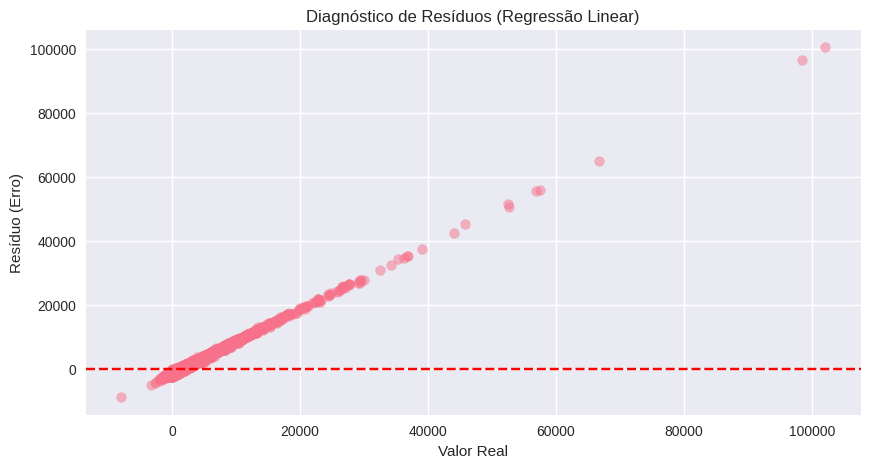

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("--- Requisito de Regressão: Prevendo 'Balance' (Saldo) ---")

# Selecionando variáveis para regressão
X_reg = df[['age', 'duration', 'campaign']]
y_reg = df['balance']

# Divisão
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# --- A. Regressão Linear Múltipla ---
lin_reg = LinearRegression()
lin_reg.fit(Xr_train, yr_train)
yr_pred_lin = lin_reg.predict(Xr_test)

# --- B. Regressão Polinomial (Grau 2) ---
poly = PolynomialFeatures(degree=2)
Xr_train_poly = poly.fit_transform(Xr_train)
Xr_test_poly = poly.transform(Xr_test)

poly_reg = LinearRegression()
poly_reg.fit(Xr_train_poly, yr_train)
yr_pred_poly = poly_reg.predict(Xr_test_poly)

# --- Avaliação ---
def avaliar_regressao(y_true, y_pred, modelo):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"Modelo {modelo}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.4f}")

avaliar_regressao(yr_test, yr_pred_lin, "Linear Múltipla")
avaliar_regressao(yr_test, yr_pred_poly, "Polinomial (Grau 2)")

# Gráfico de Resíduos (Diagnóstico solicitado no PDF)
plt.figure(figsize=(10, 5))
plt.scatter(yr_test, yr_test - yr_pred_lin, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Diagnóstico de Resíduos (Regressão Linear)")
plt.xlabel("Valor Real")
plt.ylabel("Resíduo (Erro)")
plt.show()


## **1. Introdução**

Este projeto tem como objetivo analisar e modelar a probabilidade de subscrição do depósito a prazo (*term deposit*) por clientes de uma instituição bancária, a partir de dados de campanhas de marketing realizadas por telefone.

A análise contemplou **Exploração de Dados (EDA)**, **tratamento de variáveis**, análise de desbalanceamento e **modelagem preditiva**, buscando padrões determinantes no comportamento dos clientes.



## **2. Descrição dos Dados e Licença**

- Este dataset está licenciado sob Creative Commons Attribution 4.0 International (CC BY 4.0)
https://creativecommons.org/licenses/by/4.0/

O conjunto de dados contém **45.211 registros** e **17 variáveis**, incluindo dados socioeconômicos, bancários e características das campanhas.

A variável **alvo (y)** indica:

| Valor | Significado |
|-------|-------------|
| **no** | Cliente não aderiu ao depósito a prazo |
| **yes** | Cliente aderiu ao depósito a prazo |



## **3. Distribuição da Variável Alvo**

Observa-se um **forte desbalanceamento**:

- **Classe majoritária:** `no` (~ 88%)
- **Classe minoritária:** `yes` (~ 12%)

O desbalanceamento impacta diretamente a avaliação dos modelos, exigindo atenção ao *Recall* e *AUC* da classe minoritária.



## **4. Tratamento de Dados Ausentes**

Variáveis com valores ausentes identificadas:

| Variável  | % de Nulos |
|-----------|------------|
| job       | 0,64%      |
| education | 4,11%      |
| contact   | 28,80%     |
| poutcome  | 81,75%     |

Estratégia adotada:

- **Variáveis categóricas**: preenchidas com a **moda**
- Não houve necessidade de remoção de registros



## **5. Análise Exploratória de Dados (EDA)**

### **5.1 Outliers**

Variáveis com grande extensão de valores:

- **balance**
- **duration**
- **pdays**
- **campaign**

Mantidos para preservar a representatividade do comportamento real e evitar distorção.

### **5.2 Distribuição das Variáveis Numéricas**

Principais padrões:

- **age:** maioria entre 30–50 anos
- **duration:** altamente concentrada abaixo de 600 segundos
- **campaign e previous:** majoritariamente ≤ 5 contatos
- **balance:** concentração próxima de zero, poucos valores extremos

### **5.3 Distribuição das Variáveis Categóricas**

Pontos observados:

- Predominância de **blue-collar** e **management**
- Estado civil mais comum: **married**
- Escolaridade predominante: **secondary**
- Contato por **celular** majoritário
- `poutcome` quase sempre `unknown`



## **6. Correlações**

A matriz evidenciou baixa correlação entre variáveis numéricas, com única relação relevante:

- **pdays ≈ previous (0.45)**  
  Indica histórico prévio associado a contatos recentes.



## **7. Relação com o Target (y)**

### **Variáveis Numéricas**

- **duration**: principal indicador de sucesso  
  *Ligações mais longas aumentam taxa de conversão.*

- **campaign**: contatos excessivos reduzem probabilidade de aceitação  
  *Efeito de desgaste.*

### **Variáveis Categóricas**

- **poutcome = success** → maior taxa de adesão
- **contact = cellular** → desempenho superior
- Meses com maior conversão: **março, setembro, outubro e dezembro**



## **8. Análise Temporal**

| Métrica | Mês |
|---------|-----|
| **Maior volume de ligações** | maio |
| **Maior taxa de sucesso** | março, setembro e dezembro |

Conclusão: **mais ligações não significam maior conversão.**



## **9. Modelagem Preditiva (Classificação)**

Comparação dos modelos:

| Modelo | Acurácia | ROC-AUC |
|--------|----------|---------|
| Naive Bayes | ~ 0.78 | 0.90 |
| **Regressão Logística** | **~ 0.89** | **0.93** |

**Melhor desempenho geral:** Regressão Logística  
Naive Bayes gerou mais falsos positivos  
Logística apresentou melhor equilíbrio entre sensibilidade e precisão


## **10. Considerações Finais**

Principais fatores de conversão:

- **duration**
- **poutcome**
- **contact**
- **month**

Eficiência maior observada em:

- ligações mais qualificadas (maior duração)
- campanhas com histórico anterior positivo
- abordagem via celular

### 11. Limitações e Vieses

- O dataset é altamente desbalanceado (≈ 88% não, 12% sim), o que limita recall.
- A variável **duration** indica vazamento de informação (*leakage*), pois só é conhecida depois da tentativa.
- Muitas categorias possuem valores "unknown", especialmente `poutcome`, podendo afetar interpretação.
- Histórico econômico e perfil completo do cliente não são incluídos, reduzindo robustez preditiva.

## **12. Próximos Passos**

Recomenda-se:

- Técnicas de balanceamento: **SMOTE, ADASYN, class_weight**
- Avaliação de modelos adicionais:
  - Random Forest
  - XGBoost
  - LightGBM
- Otimização de **threshold**
- Análise de **feature importance**



## **13. Referências**

- Moro, S., Cortez, P., & Rita, P. (2014). A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, 62, 22–31.
Disponível em: UCI Machine Learning Repository
https://archive.ics.uci.edu/dataset/222/bank+marketing
